In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d
import os
#import sklearn as sk
#import scipy as sc
#import keras as ks
#import tensorflow as tf

%matplotlib inline

In [59]:
path_m,path_r = "/home/tannus/res/merge","/home/tannus/res/radix"
files_m,files_r = [],[]

for r, d, f in os.walk(path_m):
    for file in f:
        files_m.append(os.path.join(r, file))
for r, d, f in os.walk(path_r):
    for file in f:
        files_r.append(os.path.join(r, file))
        
avg1,avg2 = [],[]
#for i in range(600):
for file_r,file_m in zip(files_r,files_m):
        f1,f2 = open(file_r),open(file_m)
        avg1.append([float(x) for x in f1.readlines()])
        avg2.append([float(x) for x in f2.readlines()])
        f1.close()
        f2.close()

final_radix = np.mean(avg1, axis=0)
final_merge = np.mean(avg2, axis=0)

In [60]:
merge = final_merge
radix = final_radix

m3,m4,r3,r4 = [],[],[],[]



i = 0
for row,wor in zip(merge,radix):
    if i%2 == 0:
        r3.append(wor)
        m3.append(row)
    else:
        m4.append(row)
        r4.append(wor)
    i+=1

In [61]:
dig_m3,dig_m4,dig_r3,dig_r4 = m3,m4,r3,r4

In [62]:
i,j,k = 0,0,0
den_m3, den_m4, den_r3, den_r4 = [0]*300,[0]*300,[0]*300,[0]*300

for i in range(15):
    for j in range(i, 300, 15):
        den_m3[k],den_m4[k],den_r3[k],den_r4[k] = m3[j],m4[j],r3[j],r4[j]
        k+=1

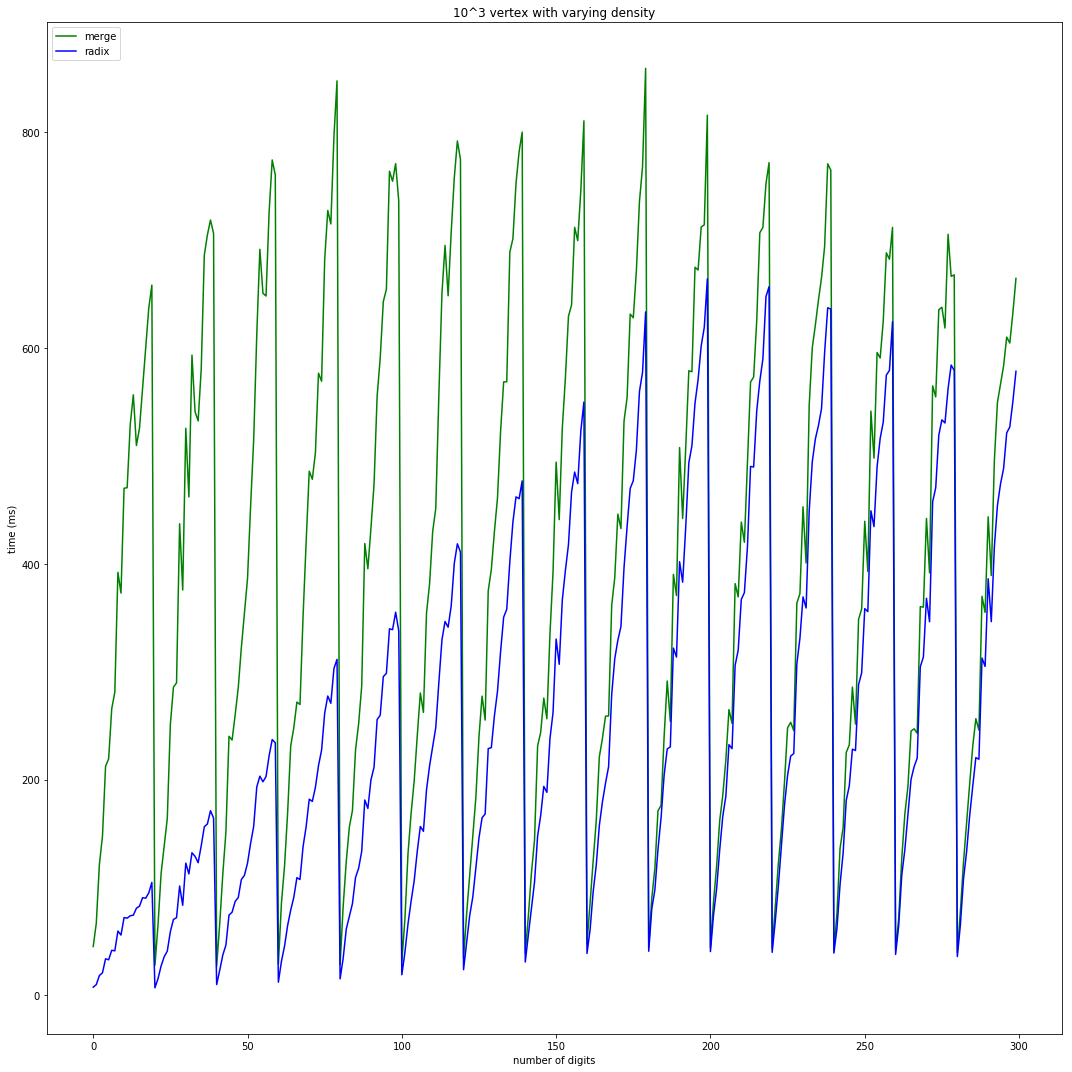

In [63]:
plt.figure(figsize=(15,15))
plt.title("10^3 vertex with varying density")
plt.plot(range(0,300),den_m3[0:300],color='green',label='merge')
plt.plot(range(0,300),den_r3[0:300],color='blue',label='radix')
plt.xlabel('number of digits')
plt.ylabel('time (ms)')
plt.legend(loc='upper left')
plt.tight_layout()

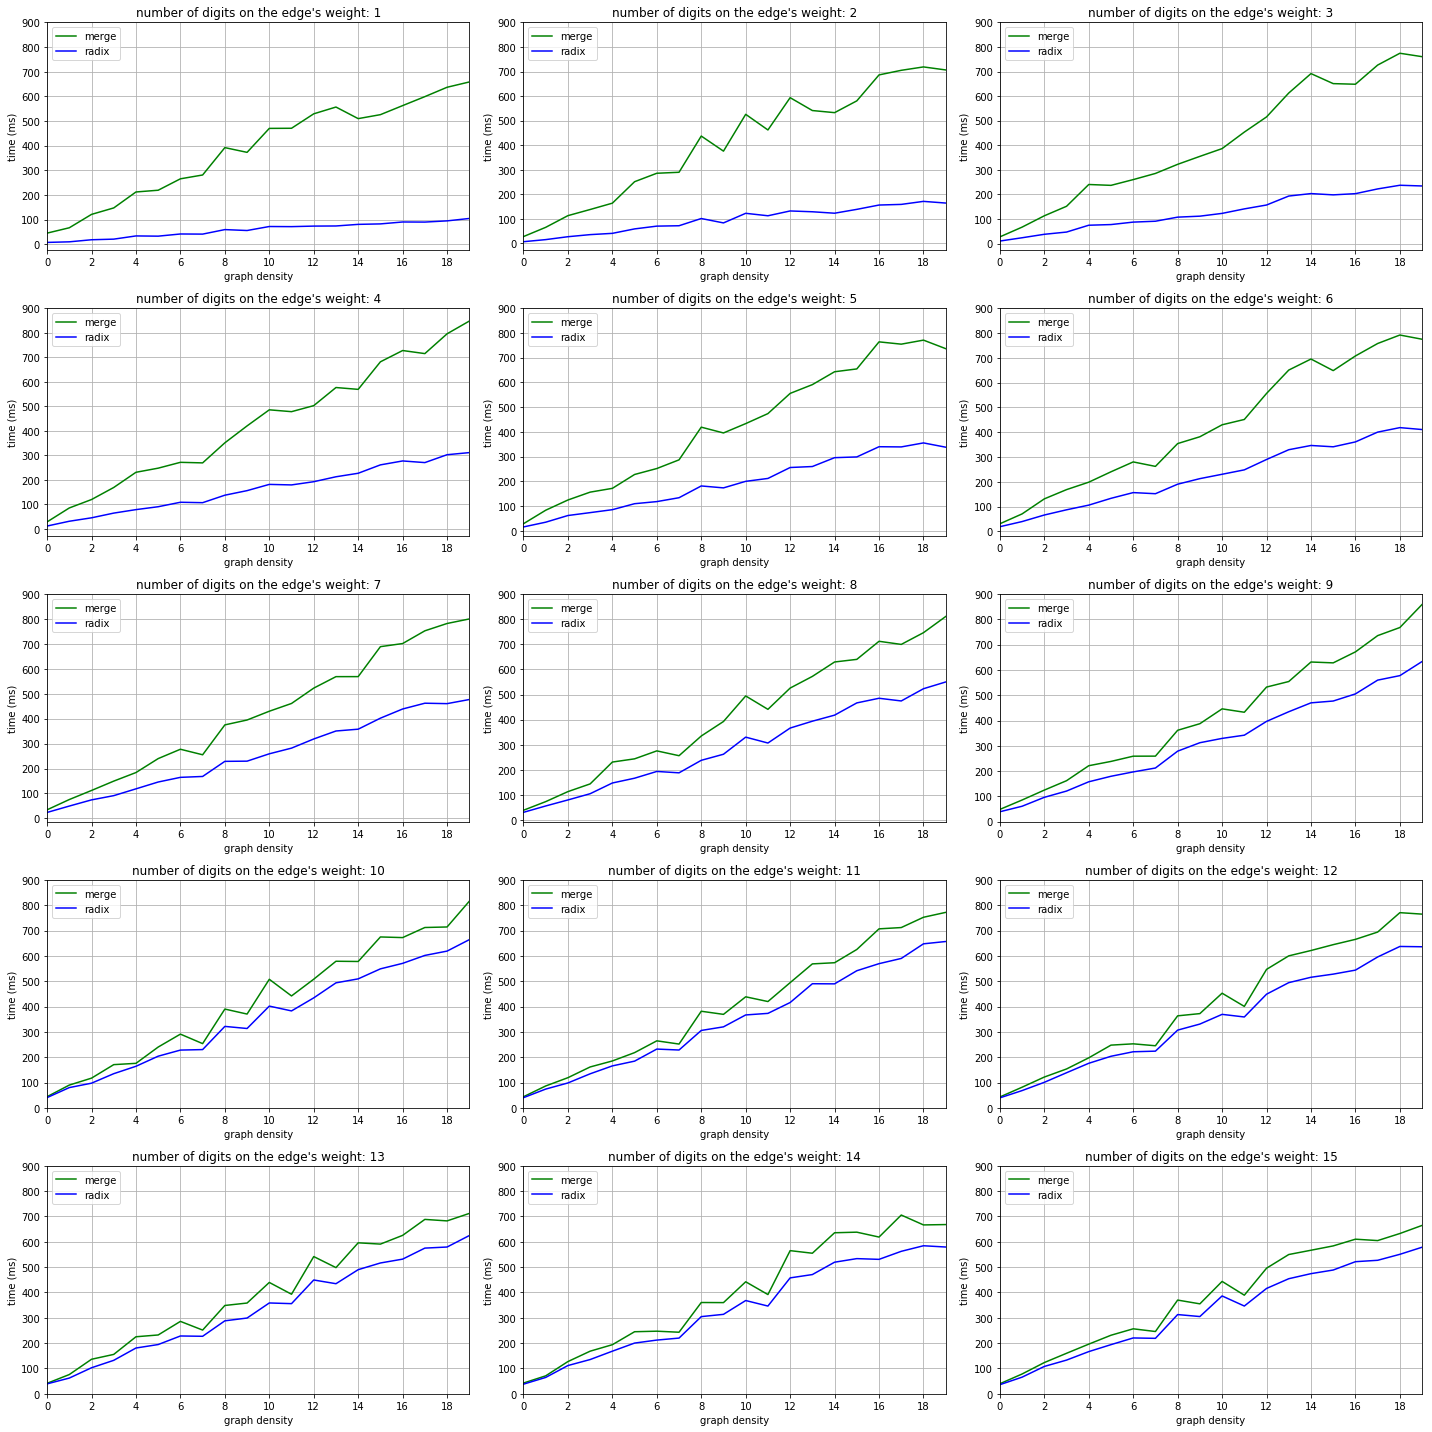

In [67]:
ys = []
for i in range(15):
    n = 0+20*i
    m = 20+20*i
    ys.append(den_m3[n:m])
    ys.append(den_r3[n:m])
    
x_ax = np.arange(20)
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

k=0
for i in range(5):
    for j in range(3):
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='green',label='merge')
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='blue',label='radix')
        axs[i][j].set_yticks(range(0,1000,100))
        axs[i][j].set_xticks(range(0,20,2))
        axs[i][j].grid(0.3)
        axs[i][j].set(xlabel='graph density', ylabel='time (ms)')
        axs[i][j].set_title('number of digits on the edge\'s weight: {}'.format(int(k/2)))
        axs[i][j].legend(loc='upper left')
        
plt.tight_layout()
plt.show()

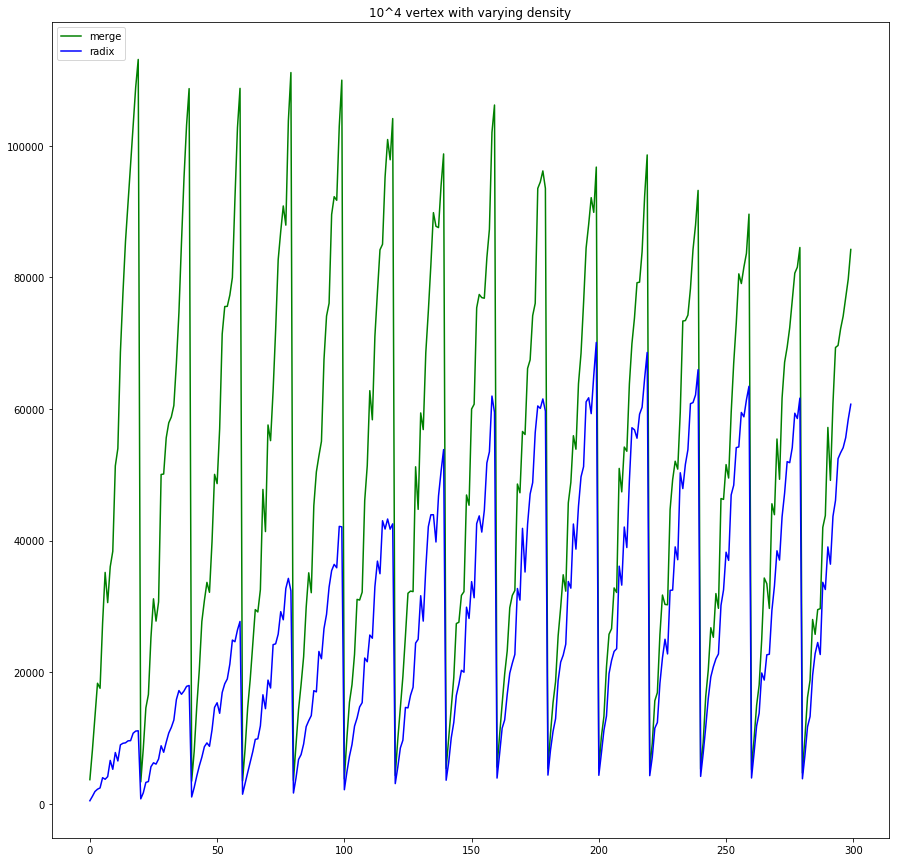

In [17]:
plt.figure(figsize=(15,15))
plt.title("10^4 vertex with varying density")
plt.plot(range(0,300),den_m4[0:300],color='green',label='merge')
plt.plot(range(0,300),den_r4[0:300],color='blue',label='radix')
plt.legend(loc='upper left')
plt.tight_layout()

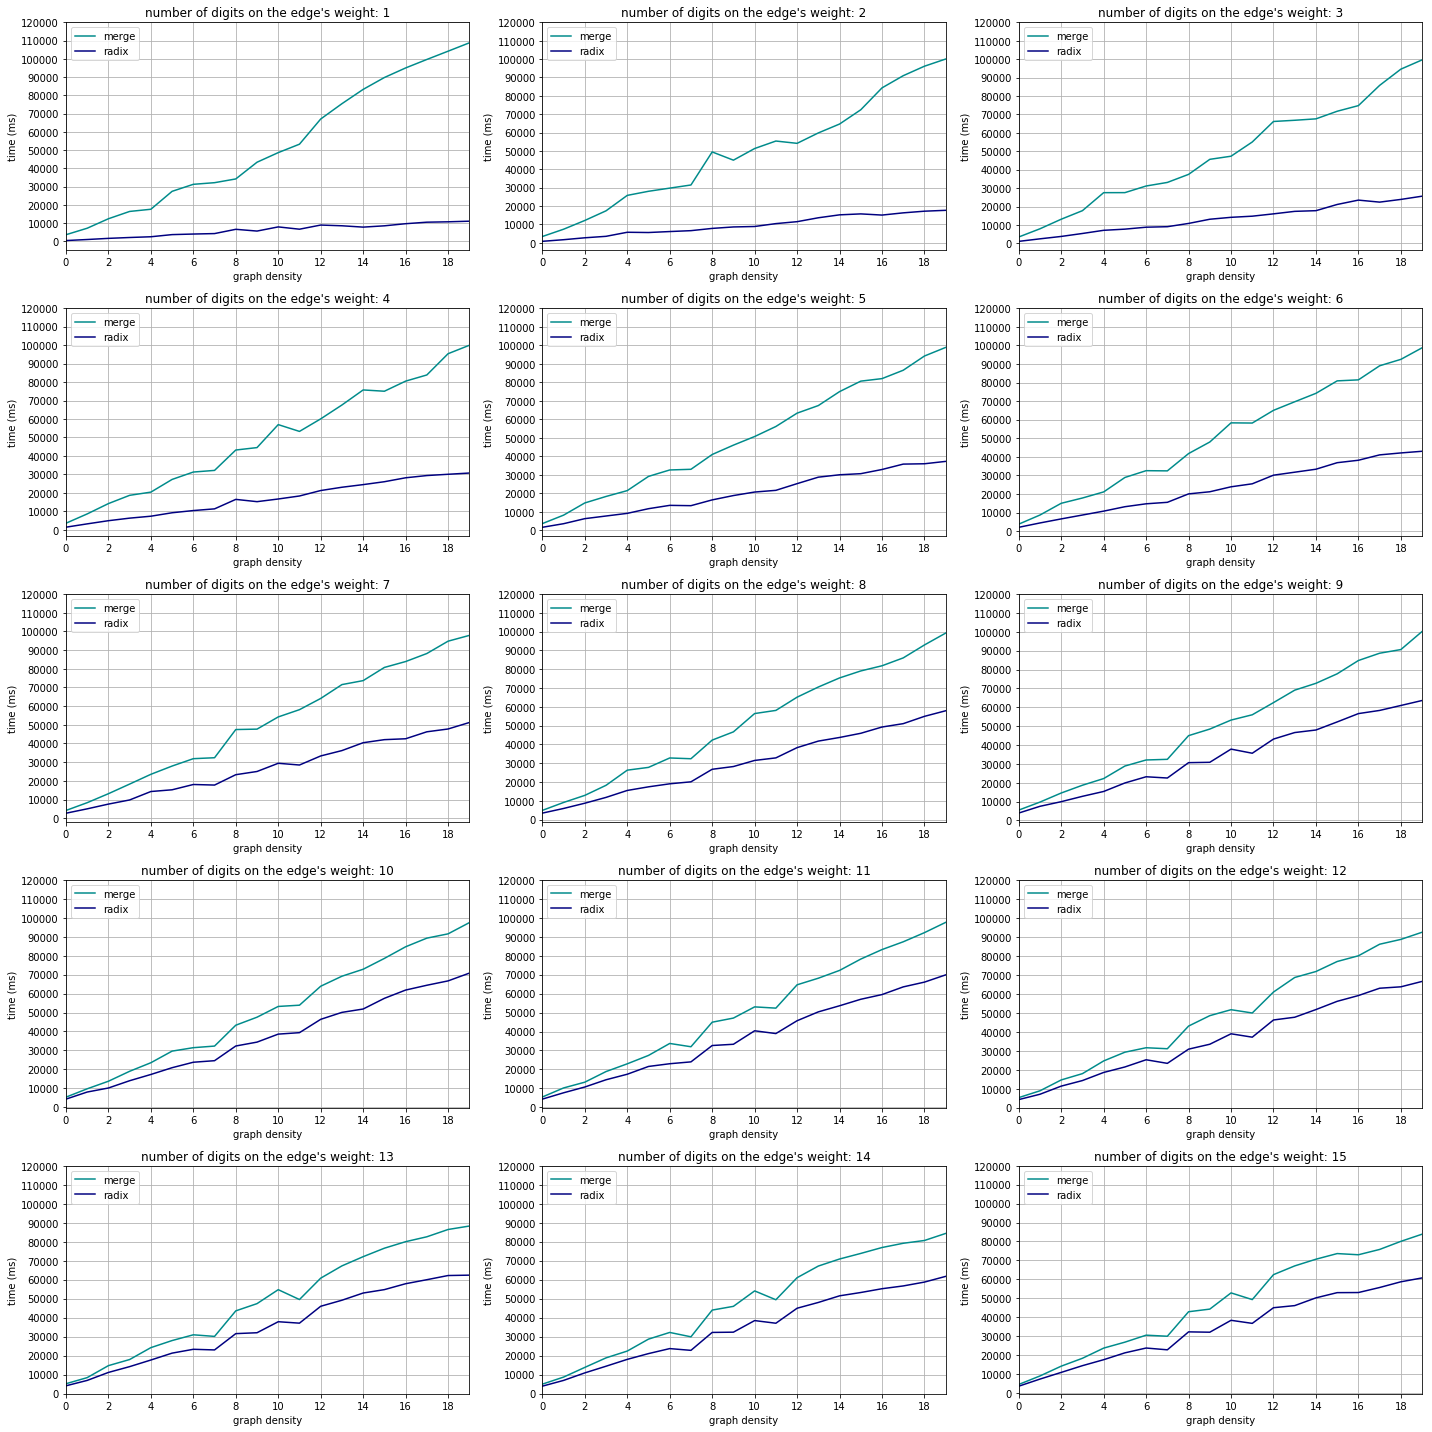

In [71]:
ys = []
for i in range(15):
    n = 0+20*i
    m = 20+20*i
    ys.append(den_m4[n:m])
    ys.append(den_r4[n:m])
    
x_ax = np.arange(20)
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

k=0
for i in range(5):
    for j in range(3):
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='darkcyan',label='merge')
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='navy',label='radix')
        axs[i][j].set_yticks(range(0,130000,10000))
        axs[i][j].set_xticks(range(0,20,2))
        axs[i][j].grid(0.3)
        axs[i][j].set(xlabel='graph density', ylabel='time (ms)')
        axs[i][j].set_title('number of digits on the edge\'s weight: {}'.format(int(k/2)))
        axs[i][j].legend(loc='upper left')
        
plt.tight_layout()
plt.show()

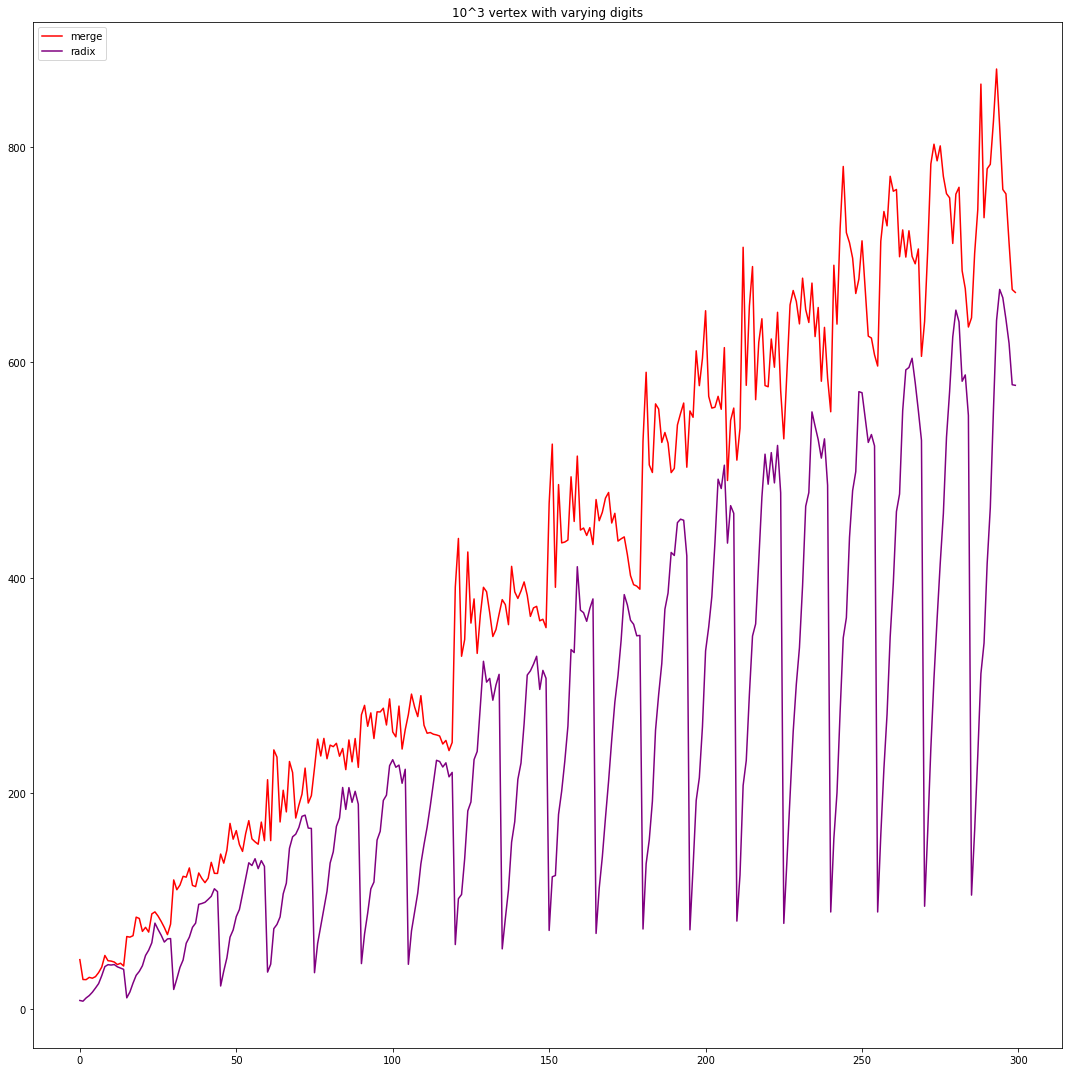

In [53]:
plt.figure(figsize=(15,15))
plt.title("10^3 vertex with varying digits")
plt.plot(range(0,300),dig_m3[0:300],color='crimson',label='merge')
plt.plot(range(0,300),dig_r3[0:300],color='olive',label='radix')
plt.legend(loc='upper left')
plt.tight_layout()

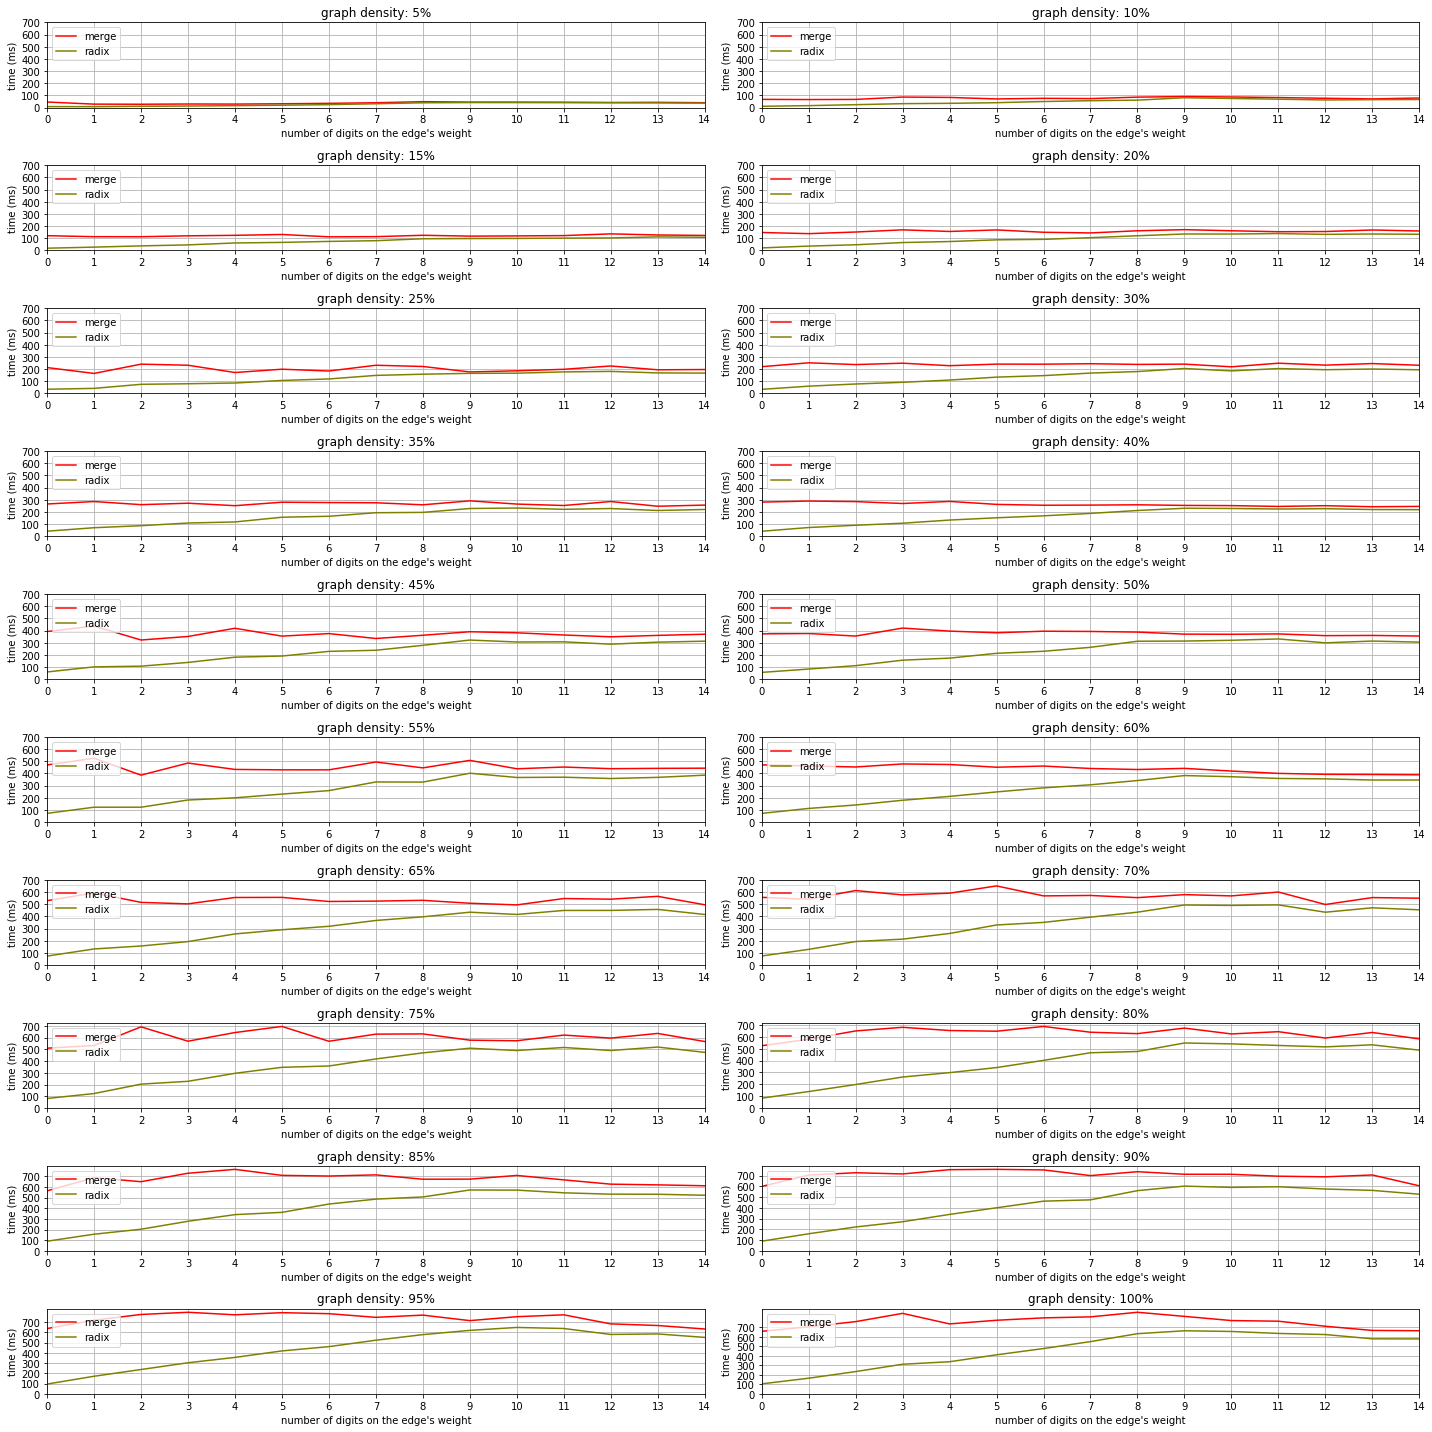

In [75]:
ys = []
for i in range(20):
    n = 0+15*i
    m = 15+15*i
    ys.append(dig_m3[n:m])
    ys.append(dig_r3[n:m])
    
x_ax = np.arange(15)
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(20,20))

k=0
m=0
for i in range(10):
    for j in range(2):
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='crimson',label='merge')
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='olive',label='radix')
        m+=5
        axs[i][j].set_yticks(range(0,800,100))
        axs[i][j].set_xticks(range(0,15,1))
        axs[i][j].grid(0.3)
        axs[i][j].set(xlabel='number of digits on the edge\'s weight', ylabel='time (ms)')
        axs[i][j].set_title('graph density: {}%'.format(m))
        axs[i][j].legend(loc='upper left')
        
plt.tight_layout()
plt.show()

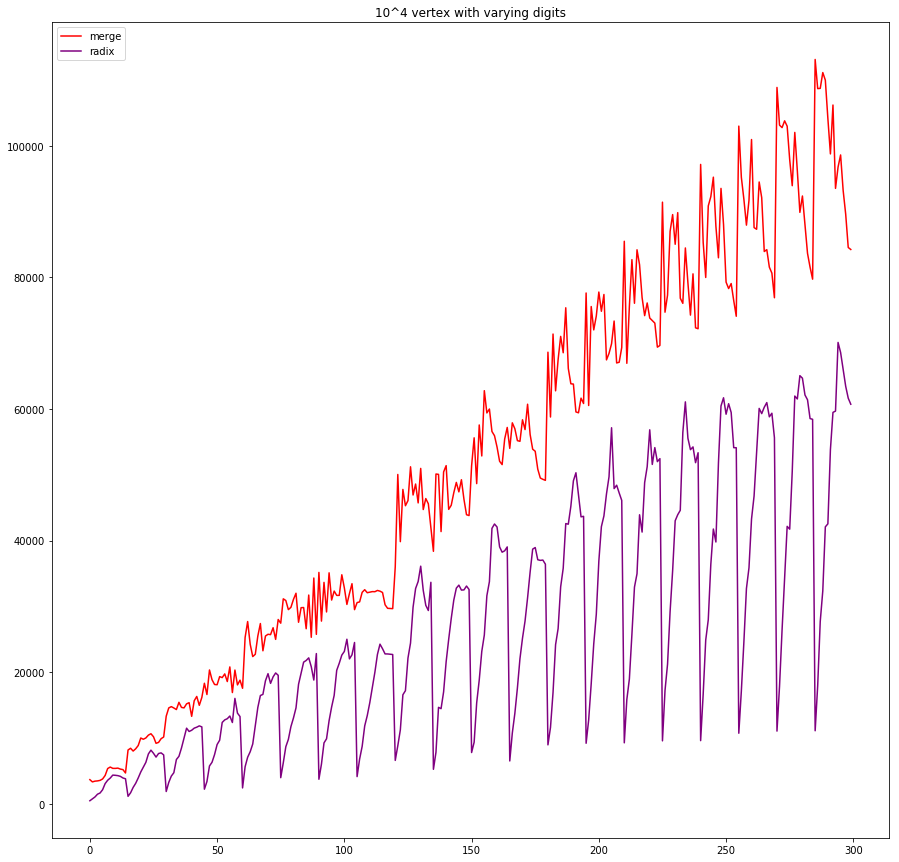

In [23]:
plt.figure(figsize=(15,15))
plt.title("10^4 vertex with varying digits")
plt.plot(range(0,300),dig_m4[0:300],color='hotpink',label='merge')
plt.plot(range(0,300),dig_r4[0:300],color='y',label='radix')
plt.legend(loc='upper left')

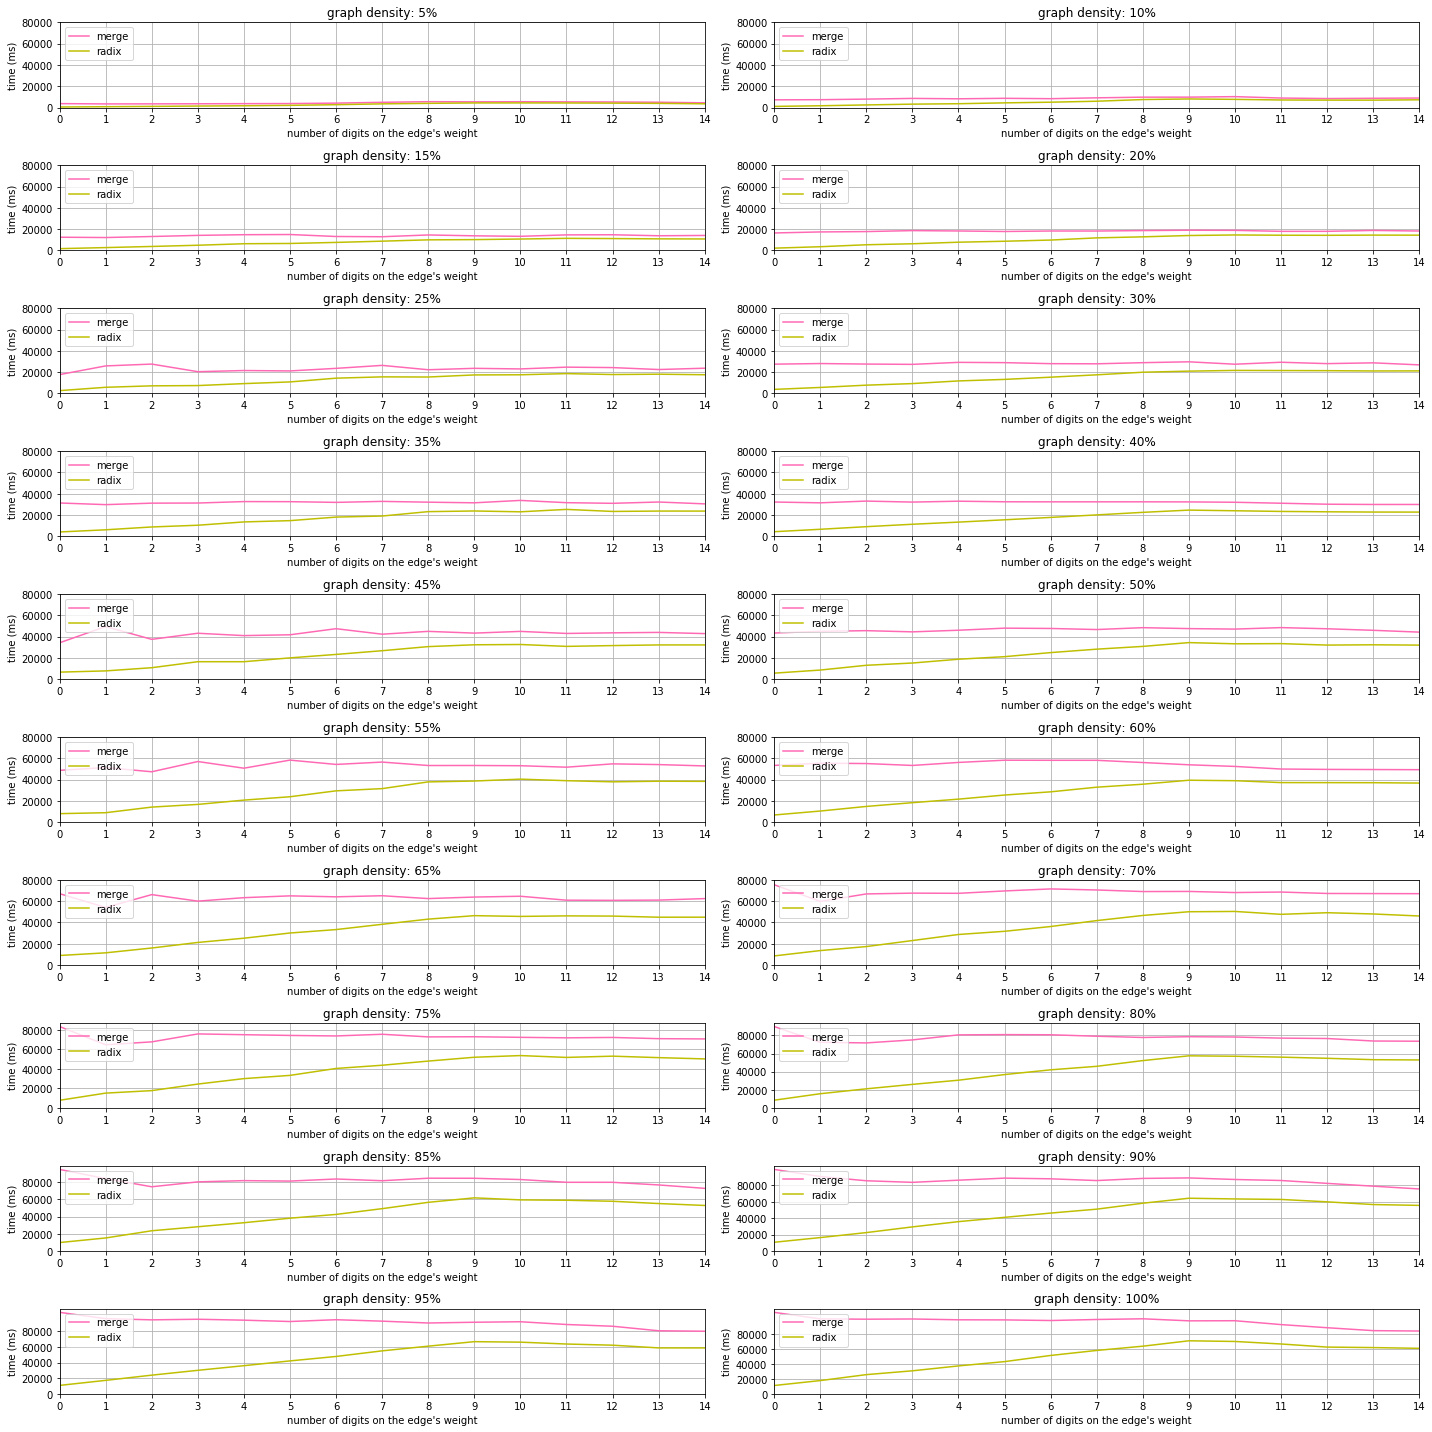

In [80]:
ys = []
for i in range(20):
    n = 0+15*i
    m = 15+15*i
    ys.append(dig_m4[n:m])
    ys.append(dig_r4[n:m])
    
x_ax = np.arange(15)
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(20,20))

k=0
m=0
for i in range(10):
    for j in range(2):
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='hotpink',label='merge')
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='y',label='radix')
        m+=5
        axs[i][j].set_yticks(range(0,100000,20000))
        axs[i][j].set_xticks(range(0,15,1))
        axs[i][j].grid(0.3)
        axs[i][j].set(xlabel='number of digits on the edge\'s weight', ylabel='time (ms)')
        axs[i][j].set_title('graph density: {}%'.format(m))
        axs[i][j].legend(loc='upper left')
        
plt.tight_layout()
plt.show()

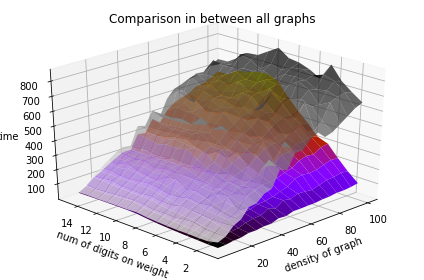

In [195]:
fig = plt.figure()
ax = plt.axes(projection="3d")

#X is density, Y is digit_numbers and Z is time
x = np.arange(5,105,5)
y = np.arange(1,16,1)

X, Y = np.meshgrid(x, y)
zs1 = np.array(den_m3)
zs2 = np.array(den_r3)
Z1 = zs1.reshape(Y.shape)
Z2 = zs2.reshape(Y.shape)

ax.set_xlabel('density of graph')
ax.set_ylabel('num of digits on weight')
ax.set_zlabel('time')
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1,cmap='gnuplot', edgecolor='none',alpha=1)
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1,cmap='binary', edgecolor='none',alpha=0.7)


ax.view_init(30, 225)
ax.set_title('Comparison in between all graphs');
plt.tight_layout()
plt.show()

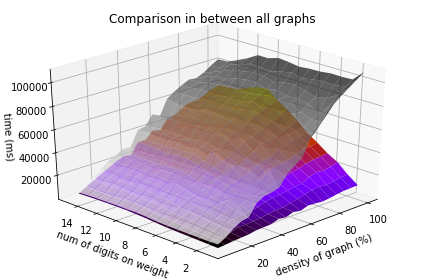

In [202]:
fig = plt.figure()
ax = plt.axes(projection="3d")

#X is density, Y is digit_numbers and Z is time
x = np.arange(5,105,5)
y = np.arange(1,16,1)

X, Y = np.meshgrid(x, y)
zs1 = np.array(den_m4)
zs2 = np.array(den_r4)
Z1 = zs1.reshape(Y.shape)
Z2 = zs2.reshape(Y.shape)

ax.set_xlabel('density of graph (%)')
ax.set_ylabel('num of digits on weight')
ax.set_zlabel('time (ms)')
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1,cmap='gnuplot', edgecolor='none',alpha=1,label='radix')
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1,cmap='binary', edgecolor='none',alpha=0.7,label='merge')


ax.view_init(30, 225)
ax.set_title('Comparison in between all graphs');
plt.tight_layout()
plt.show()

(array([45., 56., 33., 38., 25., 23., 29., 25., 19.,  7.]),
 array([  482. ,  7514.1, 14546.2, 21578.3, 28610.4, 35642.5, 42674.6,
        49706.7, 56738.8, 63770.9, 70803. ]),
 <a list of 10 Patch objects>)

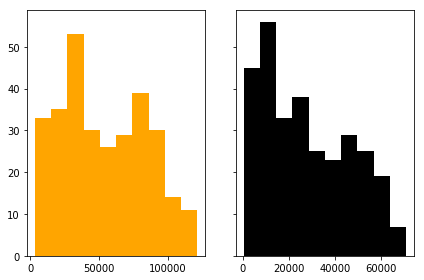

In [29]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(den_m4,color='orange')
axs[1].hist(den_r4,color='black')

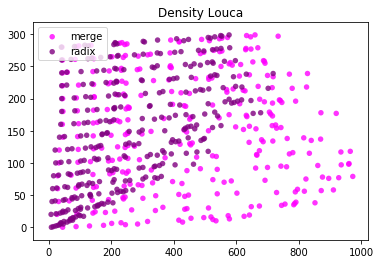

In [27]:
N = 300
g1 = (den_m3,np.arange(300))
g2 = (den_r3,np.arange(300))

data = (g1, g2)
colors = ("magenta", "purple")
groups = ("merge", "radix")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)#, axisbg="1.0")

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Density Louca')
plt.legend(loc=2)
plt.show()


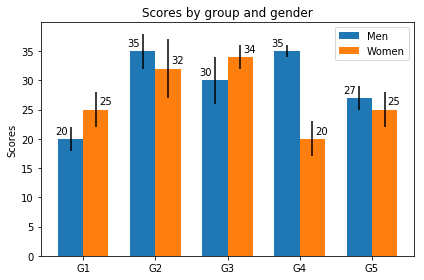

In [100]:
men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()